<a id='top'></a>

# CSCI3022 F21
# Homework 3: Stochastic Simulation
***

**Name**: Olivia Golden

***

This assignment is due on Canvas (as .ipynb) and Gradescope (as a .pdf) by **MIDNIGHT on Mon 20 Sep**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)
<a/ id='p1'></a>

## (10 pts) Problem 1: A Short Simulation

One of the big payoffs of simulation is that it can let us answer some probability questions that are otherwise quite difficult.  We can instead just simulate the process and get approximate results based on simulation.  We consider a few simplified variants of "games," beginning with a "solitaire" game.  

You begin with a standard, randomly shuffled deck of 52 cards. You then start dealing cards face up, one at a time, into a pile. As you deal each card, you also speak aloud, in order, the 13 card faces in a standard deck: ace, two, three, etc. (When you get to king, you start over at ace.) You keep doing this until the rank of the card you deal matches the rank you speak aloud, in which case you lose. You win if you reach the end of the deck without any matches.

**Part A**:  What is the probability that you lose immediately, on the first card?

The first call is an ace, so to lose immediatley your first card must be an ace.  There are 4 aces in a deck and 52 total cards, so the probability that you loose immediately is 4/52=1/13.


**Part B**:  Set up a simulation to answer the prompt: what is the probability that you make it all the way through the deck without a match and win?

Note that your final result should be *close* to the value of $(1-p)^{52}$, where $p$ was your result in part **A**.  This would be the theoretical result if each card flip was independent.  Was your simulated result higher or lower?  Does this match your intuition?

In [2]:
import random 
def card_game(cards):
    i=0
    while i<4:
        j=1
        while j<=13:
            if(len(cards)==0): #if the whole deck is gone through
                return 1 #one represents a win
            else:
                a=random.randint(0, len(cards)-1) #choose a random available card from deck
                if(cards[a]==j): #if card matches spoken value, the game is lost
                    return 0 #represents a loss
                cards=np.delete(cards, a) #remove card from deck once it has been pulled
            j=j+1 
        i=i+1
    print(cards)

summation=0
for a in range(100000):
    deck=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13,12,3,4,5,6,7,8,9,10,11,12,13,1,2,3,4,5,6,7,8,9,10,11,12,13])
    summation+=card_game(deck)
print('Probability of winning:',summation/100000)


Probability of winning: 0.01777


The simulated result was slightly higher than, but similar to, the theoretical result.  This result make sense since each card has an equal likely chance of causing the player to loose.

[Back to top](#top)
<a/ id='p2'></a>
## (30 pts) Problem 2: A Longer Simulation
**
Suppose we're now playing another card game, but this one uses custom cards.  In this game, your goal is to develop resources and use them to play actions.  Your deck of exactly 60 cards can consist of two types of cards: Resources (**R**) and Actions (**A**).

You want to figure out how many resources and how many actions to put into the deck.  Rather than doing some tedious algebra and counting, you decide to simulate playing the game to see how often specific amounts of *R* and *A* cards give you good hands.

1) Each game, you start with a hand of 7 cards.  A hand is *playable* if it contains at least 2 **R** cards and at least 2 **A** cards.

2) During the game, you draw one card per turn from your remaining deck.  You still want to have a good balance of **R** and **A** cards as the game progresses.  A hand is *good* if it contains at least 5 **R** cards in the first 15 cards (including your starting hand) but no more than 8 **R** cards over this same window.

3) A hand is *excellent* if it contains exactly 6 **R** cards in the first 13 cards, and then the next 2 cards are **A**.

**Part A**: Write a function `play_game` that shuffles your deck of **R** and **A** cards.  `play_game` should take as input argument the number of **R** cards in the deck and should return 3 True or False outputs: one each for whether or not the resulting hand was *playable*, *good*, and/or *excellent.*

Test run your function on some trivial cases such as `play_game(0)` and `play_game(60)` to ensure that you return "False, False, False."

In [3]:
def play_game(R):
    A=60-R #set A count to 60-^
    hand=[]
    playable=False #initalize all values to false
    good=False
    excellent=False
    while len(hand)<60:  #for a game
        card=random.randint(1, 60) #find a random card
        if (card>R and (A-1)>=0): #if card is avaliable
            A=A-1
            hand.append('A') #add to hand
        elif ((R-1)>=0):
            R=R-1
            hand.append('R')
    A_count=0 #set counts to 0
    R_count=0
    for i in range(0, 7): #for the starting hand
        if (hand[i]=='A'):
            A_count+=1 #sum up values of A and R
        else:
            R_count+=1
    if (A_count>=2 and R_count>=2): #if values satisfy playable conditions set to TRUE
        playable=True
    for i in range(7, 13): #for next part of hand
        if (hand[i]=='A'): 
            A_count+=1
        else:
            R_count+=1
    if (R_count==6 and hand[13]=='A' and hand[14]=='A'): #if values satisfy excellent conditions set to TRUE
        excellent=True
    for i in range(13, 15): #for the next part of hand
        if (hand[i]=='A'):
            A_count+=1
        else:
            R_count+=1
    if (R_count>=5 and R_count<=8): #if values satisfy good conditions set to TRUE
        good=True
    
    return playable, good, excellent
print('With 0 resources:', play_game(0))
print('With 60 resources:', play_game(60))

With 0 resources: (False, False, False)
With 60 resources: (False, False, False)


**Part B**: Our goal is to choose the input argument of `play_game(R)` that gives us the best hands.  Without doing any simulation, explain what a reasonable choice of **R** would be to maximize the chances of getting a *playable* hand.

The best choice would be 30 (half of 60), since a playable hand requires at least 2 of each kind of card in the starting hand.

**Part C**: Set up a data frame with the following columns: 'R', 'playable', 'good', 'excellent'.

Then fill in 1000 rows of the data frame by running `play_game` when `R=30`.  With this, answer the following prompts:

**C.1**: What is the approximate probability of a *good* hand when $R=30$?  

**C.2**: What is the approximate probability of an *excellent* hand when $R=30$?

**C.3**: What is the probability of a hand that is both *playable* and *good* when $R=30$?

**C.4**: What is the probability of a hand that is *good* **given** that the hand was *playable* when $R=30$?


In [4]:
R1=[30]*1000 #create large array to hold R valyes
playable1=[] #create arrays to hold good, excellent, and playable values
good1=[]
excellent1=[]
for i in range(1000): #for 1000 times
    playable1.append(play_game(30)[0]) #add playable result
    good1.append(play_game(30)[1]) #add good result
    excellent1.append(play_game(30)[2]) #add excellent result
df=pd.DataFrame()
df=df.assign(R=R1)
df=df.assign(playable=playable1)
df=df.assign(good=good1)
df=df.assign(excellent=excellent1)
print(df.head)

playable_true=df['playable'].sum() #sum up values where playable is true
good_true=df['good'].sum() #sum up values where good is true
excellent_true=df['excellent'].sum() #sum up values where excellent is true
print('Probability of a good hand:', good_true/1000) #calculate probability
print('Probability of an excellent hand:', excellent_true/1000)
playable_and_good=((df['good']) & (df['playable'])).sum() #sum up values where good and playable are true
good_given_playable=(playable_and_good/1000)/(playable_true/1000) #calculate probabilty of A given B
print('Probability of a hand that is both playable and good', playable_and_good/1000)
print('Probability of an a good hand given that the hand is playable:', good_given_playable)


<bound method NDFrame.head of       R  playable   good  excellent
0    30      True  False      False
1    30      True   True      False
2    30      True   True      False
3    30     False  False      False
4    30      True  False      False
..   ..       ...    ...        ...
995  30      True   True      False
996  30     False  False      False
997  30     False  False      False
998  30      True   True      False
999  30     False   True      False

[1000 rows x 4 columns]>
Probability of a good hand: 0.762
Probability of an excellent hand: 0.085
Probability of a hand that is both playable and good 0.661
Probability of an a good hand given that the hand is playable: 0.761520737327189


**Part D**: Using your data frame in **part C**, add additional rows for a variety of choices of $R$.  You may choose to simulate all values of $R$ from $[0, 1, 2, \dots 60]$ or some subset therein, as long as you are able to answer:

**D1**: What is the value of $R$ that is most likely to return hands that are both *playable* and *good*?

**D2**: What is the value of $R$ that is most likely to return hands that are *excellent*?

**D3**: Create a line plot with `plt.plot` to support your answers.

In [5]:
for j in range(100):
    for i in range(0,60): #add values from 0 to 60 of R
        df.loc[len(df.index)] = [i,play_game(i)[0], play_game(i)[1], play_game(i)[2]] #add values to df
print(df.head)

<bound method NDFrame.head of        R  playable   good  excellent
0     30      True  False      False
1     30      True   True      False
2     30      True   True      False
3     30     False  False      False
4     30      True  False      False
...   ..       ...    ...        ...
6995  55     False  False      False
6996  56     False  False      False
6997  57     False  False      False
6998  58     False  False      False
6999  59     False  False      False

[7000 rows x 4 columns]>


Text(0, 0.5, '# of hands')

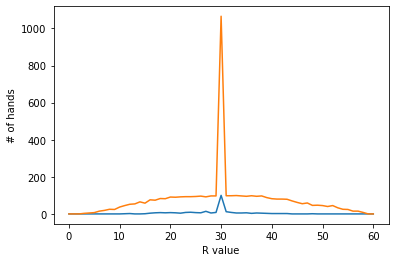

In [6]:
excellent=[0]*61 #create arrays to hold excellent sum
good_playable=[0]*61 #create arrays to hold playable and good sum

for i in range(0, df.shape[0]): 
        excellent[df['R'].values[i]]+=df['excellent'].values[i] #sum up counts of excellent for specific R values
        good_playable[df['R'].values[i]]+=df['playable'].values[i]+df['good'].values[i]
        #sum up counts of good and playable for specific R values
plt.plot(excellent)
plt.plot(good_playable)
plt.xlabel ('R value')
plt.ylabel ('# of hands')

The best R value for both good and playable hands, and excellent hands, is R=30.

#### [Back to top](#top)
<a/ id='p3'></a>

## (5 pts) Problem 3 (Theory): It's probably Bayes
***


To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *hypothesis* that has a 12% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their hypothesis is true is 40%
    2) The probability that they incorrectly *find* an important result given that their hypothesis is false is 5%

If they *find* an important result they are published.  What is the probability that their *hypothesis* was true, given that they were published?

P(correctly find result)=(.4)(.12)+(1-.12)(1-.05)=.884
P(true hypo|correclty find result)=(.12*.4)/.844=.0543